In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/crime.csv")

In [3]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
X = df.iloc[:,1:]

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(X)

StandardScaler()

In [7]:
X_norm = sc.transform(X)

In [8]:
X_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [9]:
X_norm.shape

(50, 4)

In [10]:
clusters = np.arange(2,10)

In [11]:
clusters

array([2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

In [13]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

In [14]:
eva

,K,inercia
0,2,104.961633
1,3,80.085695
2,4,58.241584
3,5,50.847646
4,6,47.917039
5,7,42.425863
6,8,39.425374
7,9,35.383494


<Axes: xlabel='K', ylabel='inercia'>

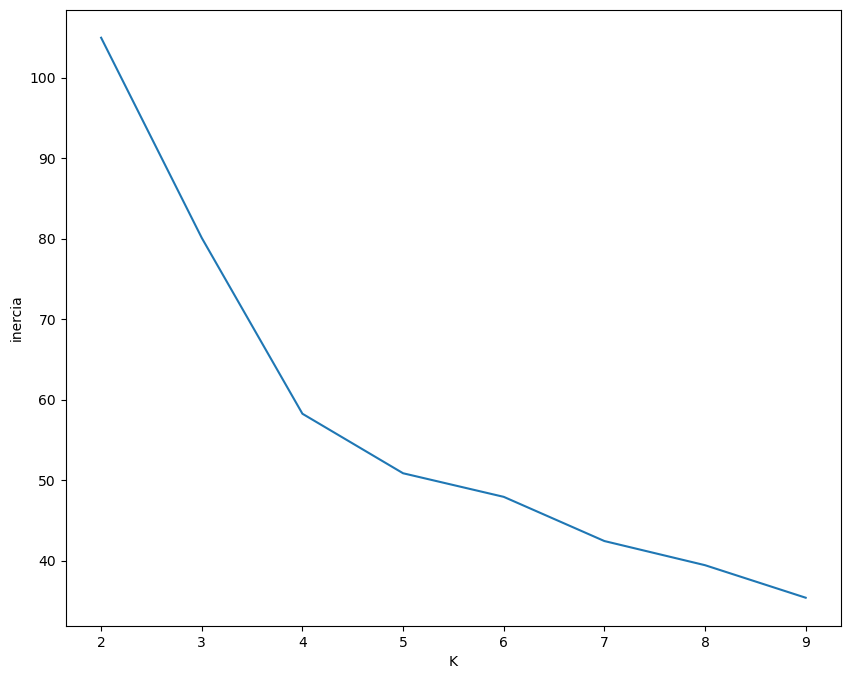

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [16]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [17]:
kmeans.fit(X_norm)

C:\Users\sebas\anaconda3\envs\Web\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [18]:
kmeans.cluster_centers_

array([[ 0.75759426,  1.13128272,  0.94567938,  1.22798509],
       [-0.44878894, -0.35858791,  0.56576856, -0.20455729],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.32475684,  0.90930557, -0.86737678,  0.29612861]])

In [19]:
df["cluster"] = kmeans.labels_

In [20]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0


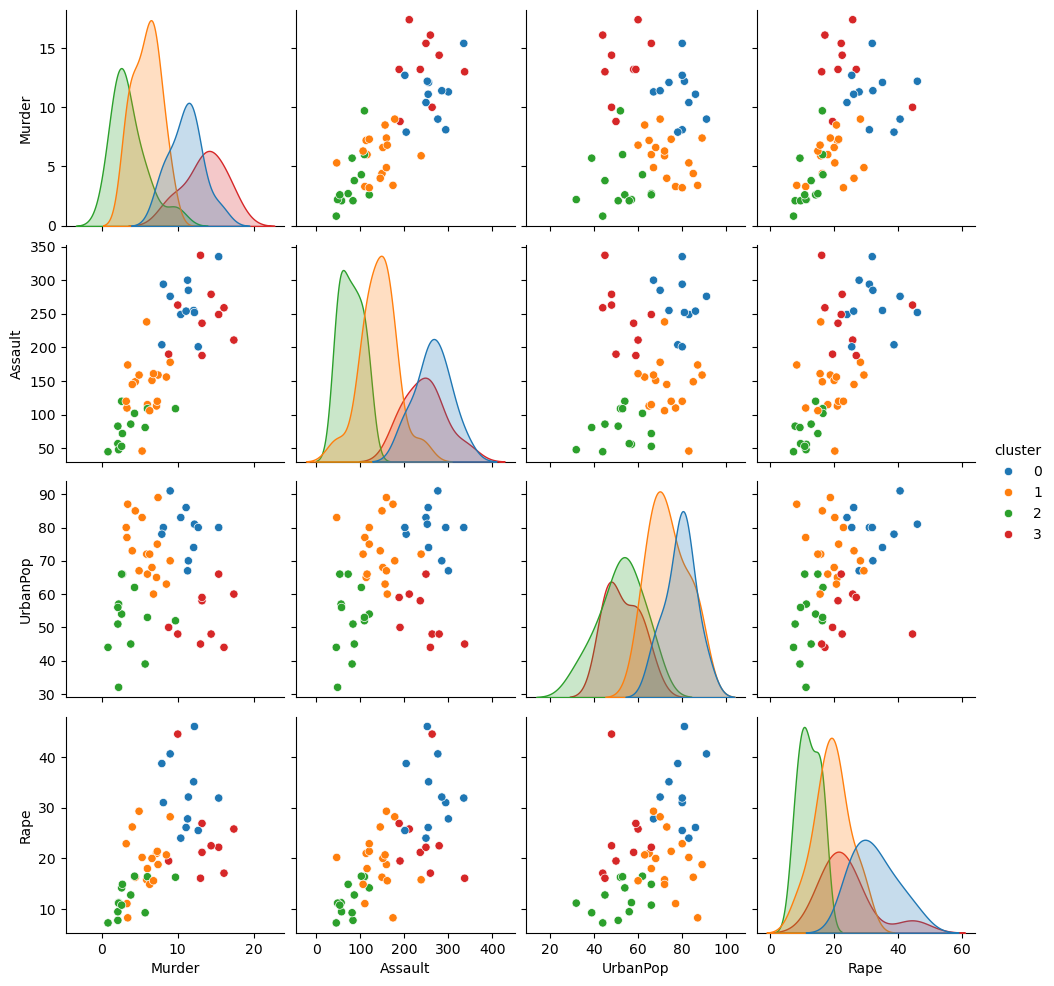

In [21]:
sns.pairplot(df,hue="cluster", palette="tab10")

In [22]:
df.loc[df["cluster"]==3]

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


<Axes: xlabel='cluster', ylabel='Murder'>

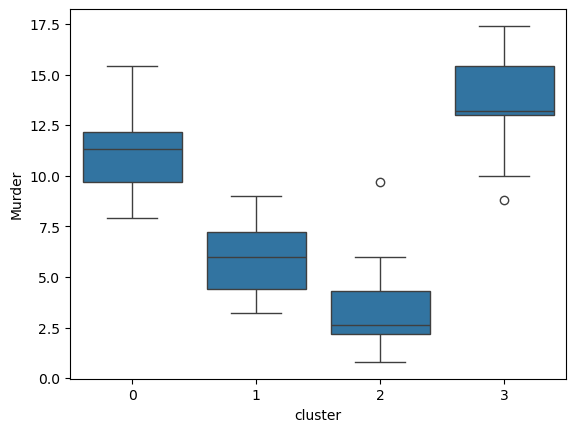

In [23]:
sns.boxplot(x="cluster", y="Murder", data=df)

<Axes: xlabel='cluster', ylabel='Rape'>

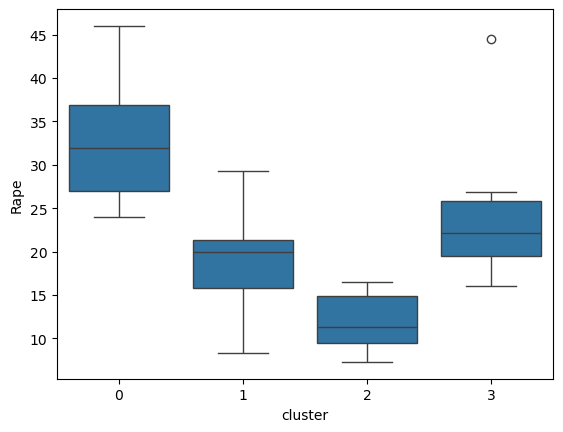

In [24]:
sns.boxplot(x="cluster", y="Rape", data=df)